# BREAST CANCER CLASSIFICATION


# 1. The Problem


- Cancer can be either benign or malignant. We are set to classify the cancer based on the set of 30 features:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Number of Samples: 569; 212 of which are Malignant and 357 Benign


https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

![image.png](https://www.gvec.org/wp-content/uploads/2019/10/Breast-Cancer-Awareness-Month-2019.jpg)

# 2. Imports

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [36]:
# Import the data from Sklearn 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [37]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [38]:
print(cancer['feature_names'])
print(cancer['data'].shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


In [39]:
# create a DataFrame from Cancer data
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                          columns = np.append(cancer['feature_names'], ['target']))

In [40]:
df_cancer.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.04451,0.1962,0.06303,0.2569,0.4981,2.011,21.03,0.005851,0.023140,0.02544,0.008360,0.01842,0.002918,14.98,17.13,101.1,686.6,0.1376,0.2698,0.2577,0.0909,0.3065,0.08177,1.0
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,0.2385,0.8265,1.572,20.53,0.003280,0.011020,0.01390,0.006881,0.01380,0.001286,15.93,30.25,102.5,787.9,0.1094,0.2043,0.2085,0.1112,0.2994,0.07146,0.0
53,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,0.8337,1.5930,4.877,98.81,0.003899,0.029610,0.02817,0.009222,0.02674,0.005126,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987,0.0
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.92,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.1571,0.3206,0.06938,0.0
509,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,0.3331,1.9610,2.937,32.52,0.009538,0.049400,0.06019,0.020410,0.02105,0.006000,17.11,36.33,117.7,909.4,0.1732,0.4967,0.5911,0.2163,0.3013,0.10670,0.0


# 3. EDA

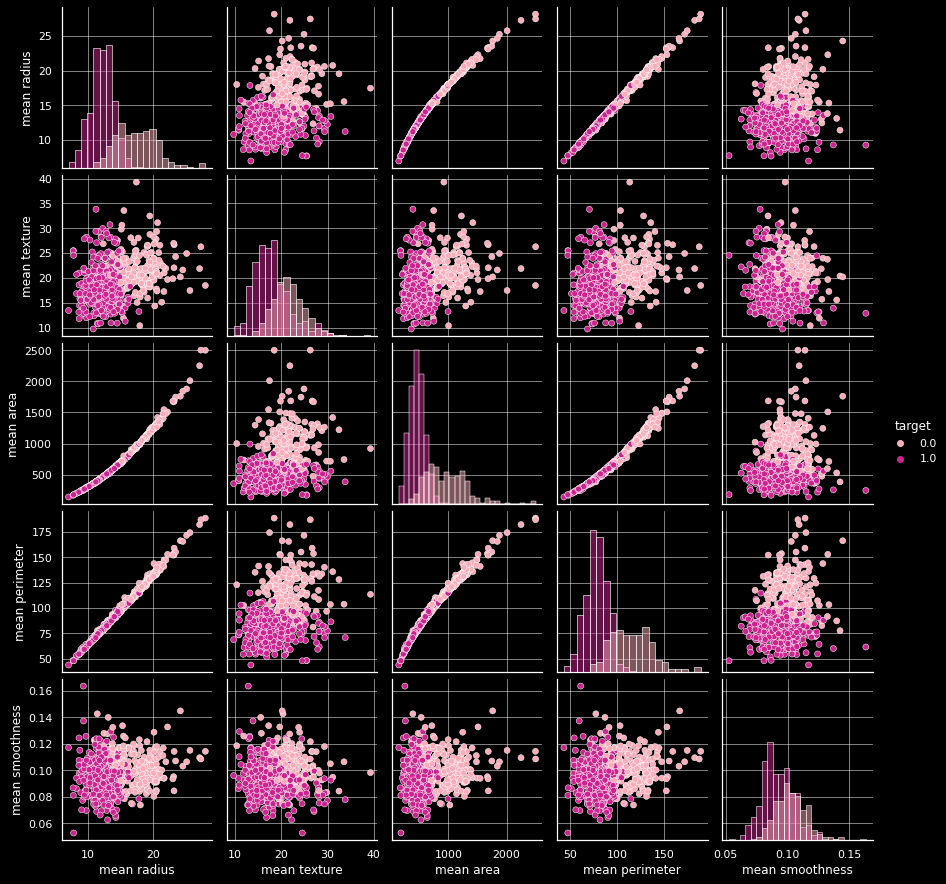

In [50]:
sns.set(style="darkgrid")
plt.style.use("dark_background")
sns.set_palette('RdPu')
sns.pairplot(df_cancer, 
             hue = 'target', 
             vars = ['mean radius', 
                     'mean texture',
                     'mean area',
                     'mean perimeter', 
                     'mean smoothness'],
             palette="RdPu",
              diag_kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


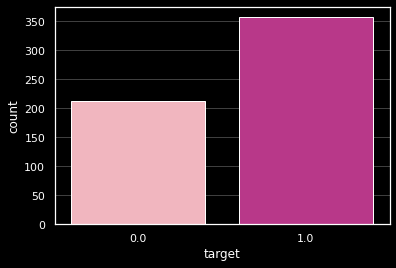

In [51]:
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.countplot(df_cancer['target'],palette='RdPu')


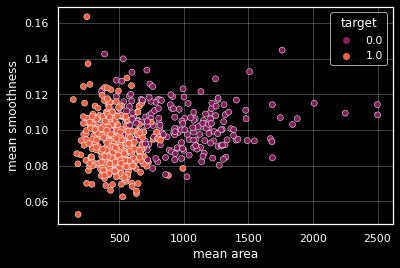

In [53]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer, palette='rocket')

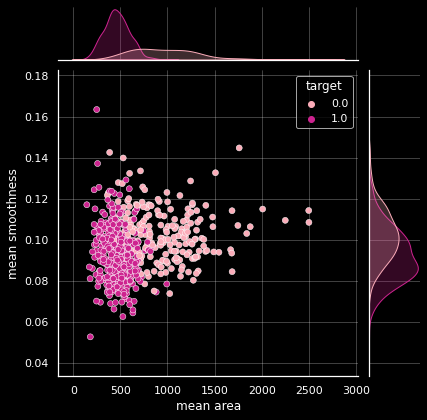

In [59]:
sns.jointplot(x="mean area", y="mean smoothness", hue ='target', data = df_cancer, palette = 'RdPu')

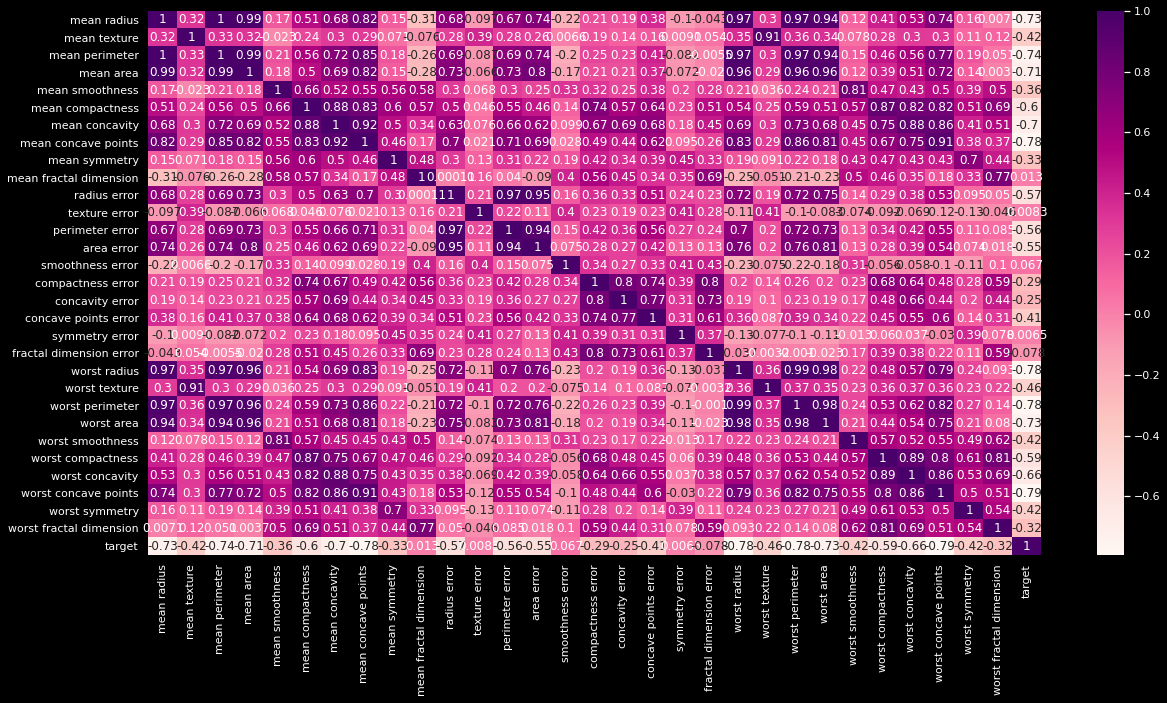

In [61]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df_cancer.corr(), annot=True, cmap='RdPu') 

# 4. Training

In [73]:
X = df_cancer.drop(['target'],axis=1)
y = df_cancer['target']
display(X,y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [74]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle = True, random_state=69)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 30), (86, 30), (483,), (86,))

In [67]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 5. Validation

In [68]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        44
         1.0       0.81      1.00      0.89        42

    accuracy                           0.88        86
   macro avg       0.90      0.89      0.88        86
weighted avg       0.91      0.88      0.88        86



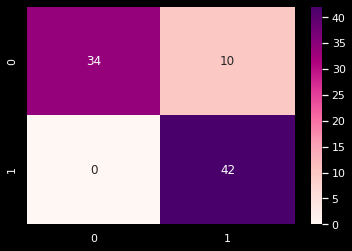

In [70]:
sns.heatmap(cm, annot=True, cmap='RdPu')
print(classification_report(y_test, y_predict))

# 6. Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.079625,0.093730,0.286336,-0.034004,-1.256485,2.358365,2.780399,0.817530,-0.361517,2.193690,-0.134207,0.473346,0.267831,-0.222373,-0.576328,2.712054,4.165272,1.845061,0.710127,3.690599,-0.157632,-0.298503,0.037182,-0.266484,-1.826788,1.095674,1.998621,0.606418,-0.812260,1.379430
1,-2.008583,-1.342507,-1.961506,-1.436268,1.514060,-0.508926,-1.093132,-1.233315,0.475936,2.265098,-0.625137,0.505532,-0.626263,-0.636240,0.992843,-0.792083,-1.144813,-1.915960,0.832288,0.136924,-1.706625,-0.976574,-1.672212,-1.202668,1.161638,-0.813759,-1.260204,-1.712306,0.142259,0.580313
2,0.159951,1.915579,0.240580,0.049313,1.291728,1.119149,1.020993,0.703390,1.858103,1.185229,-0.108722,-0.343821,0.015974,-0.152035,-0.477213,0.946216,0.609550,-0.127342,-0.221186,0.683582,0.296347,1.870031,0.553715,0.152100,1.569289,2.617602,2.115368,0.925338,2.440971,2.818731
3,-0.651922,-0.594371,-0.674945,-0.628755,0.660592,-0.795034,-0.629805,-0.549525,-1.714040,-0.464448,0.170545,2.293643,0.199539,-0.113242,-0.165752,-0.629049,-0.159764,0.228741,-0.875338,-0.020350,-0.571677,-0.015299,-0.592325,-0.556562,-0.195752,-0.924840,-0.757663,-0.638760,-2.038478,-0.552789
4,1.671815,0.670995,1.624475,1.782538,0.173613,0.015896,0.814611,1.264624,-0.813593,-1.265970,1.265316,-0.372431,1.462218,1.549941,-0.192696,-0.346493,0.109995,0.579901,-0.879279,-0.704673,2.368677,0.858588,2.447672,2.752253,0.849395,0.429830,1.320720,1.966838,-0.150889,-0.401634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,-0.798231,2.338138,-0.843409,-0.737154,-1.534758,-1.287807,-1.093132,-1.233315,-2.747886,-1.110038,-0.306581,4.775541,-0.389905,-0.359640,0.160143,-0.900149,-1.144813,-1.915960,-0.047796,-0.794315,-0.868025,2.059373,-0.923692,-0.747981,-1.688881,-1.230375,-1.260204,-1.712306,-2.299452,-1.351906
479,-0.471187,-0.991529,-0.526448,-0.497582,-0.650450,-1.091047,-0.821095,-0.693121,-0.854354,-0.809831,-0.061647,-0.567693,-0.118189,-0.203190,0.194785,-0.921464,-0.661170,-0.225798,1.240805,-0.930779,-0.603204,-1.411899,-0.654248,-0.580869,-1.162838,-1.150576,-1.023779,-0.973858,-0.991009,-1.313562
480,0.010773,-0.827586,-0.056415,-0.101465,-1.163966,-0.894870,-0.823933,-0.535849,-0.787654,-0.987623,-0.660178,-1.019906,-0.600593,-0.435520,-0.724200,-0.880320,-0.803894,-0.150315,-1.122287,-0.661853,-0.239600,-1.013795,-0.279082,-0.302409,-1.223552,-0.931862,-0.959448,-0.446483,-1.280583,-0.904556
481,-0.049472,1.040445,0.025529,-0.126547,2.611377,1.455174,0.916512,1.179939,1.665415,1.686545,0.580775,1.260114,0.514845,0.277882,0.554681,0.322719,0.006754,0.202486,-0.035974,0.299400,0.662053,2.633873,0.686625,0.527074,3.945806,1.744281,0.971921,1.389083,2.823493,1.401659


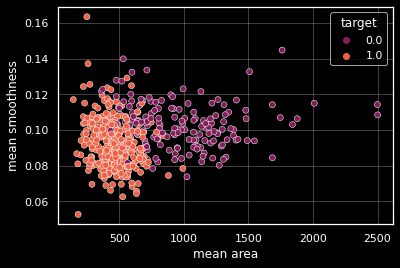

In [79]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train, palette='rocket')

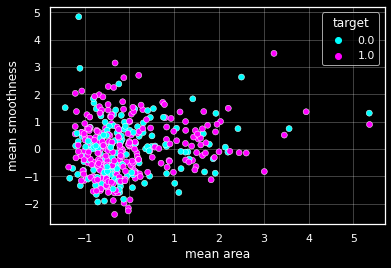

In [82]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'], hue = y_train, palette='cool')

In [84]:
X_test_scaled = sc.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [85]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89        44
         1.0       0.84      0.98      0.90        42

    accuracy                           0.90        86
   macro avg       0.90      0.90      0.89        86
weighted avg       0.91      0.90      0.89        86



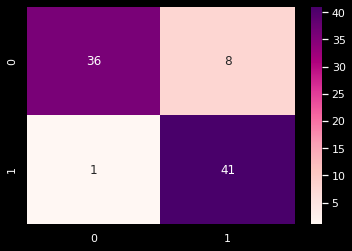

In [87]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(cm,annot=True,fmt="d", cmap='RdPu')

# Tuning

In [88]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [89]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,y_train)

In [92]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [93]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
grid_predictions = grid.predict(X_test_scaled)

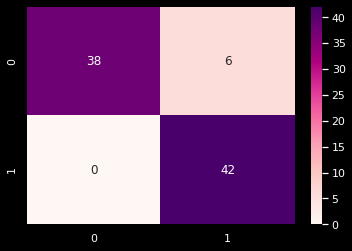

In [97]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True, cmap='RdPu')
print(classification_report(y_test,grid_predictions))